In [1]:
from ROOT import TGraph, TFile, TGraphAsymmErrors
from array import array
import os
import glob,math
import operator
import matplotlib.pyplot as plt

path_sig_ll_deepCSV= '../ll_deepCSV/sig/*Output_pseudo_NLO_Mchi-1_Mphi*.root'
path_bkg_ll_deepCSV='../ll_deepCSV/bkg/*.root'
looseWP_deepCSV=[sorted(glob.glob(path_sig_ll_deepCSV)),sorted(glob.glob(path_bkg_ll_deepCSV))]

path_sig_mm_deepCSV= '../mm_deepCSV/sig/*Output_pseudo_NLO_Mchi-1_Mphi*.root'
path_bkg_mm_deepCSV='../mm_deepCSV/bkg/*.root'
mediumWP_deepCSV = [sorted(glob.glob(path_sig_mm_deepCSV)),sorted(glob.glob(path_bkg_mm_deepCSV))] 

path_sig_ll_CSV= '../ll_deepCSV_jet230/sig/*Output_pseudo_NLO_Mchi-1_Mphi*.root'
path_bkg_ll_CSV='../ll_deepCSV_jet230/bkg/*.root'
looseWP_CSV=[sorted(glob.glob(path_sig_ll_CSV)),sorted(glob.glob(path_bkg_ll_CSV))]

path_sig_mm_CSV= '../mm_deepCSV_jet230/sig/*Output_pseudo_NLO_Mchi-1_Mphi*.root'
path_bkg_mm_CSV='../mm_deepCSV_jet230/bkg/*.root'
mediumWP_CSV = [sorted(glob.glob(path_sig_mm_CSV)),sorted(glob.glob(path_bkg_mm_CSV))] 

wpFile = [looseWP_deepCSV,mediumWP_deepCSV,looseWP_CSV,mediumWP_CSV]
#wpFile = [looseWP_CSV,mediumWP_CSV]
#wpFile = [looseWP_deepCSV,mediumWP_deepCSV]

         
#print (files_sig_ll_deepCSV, files_bkg_ll_deepCSV)



Welcome to JupyROOT 6.14/02


In [2]:
def sig_bkg(sig,bkg,sr):
    sigfile=TFile.Open(sig,'read')
    bkgfile=TFile.Open(bkg,'read')
    htotal=sigfile.Get('h_total')
    signal=sigfile.Get('h_jet1_pT_'+sr+'_')
    bkgsum=bkgfile.Get("bkgSum")
    sfc= ((signal.Integral())/(htotal.Integral()))/(math.sqrt(bkgsum.Integral()))
    return sfc

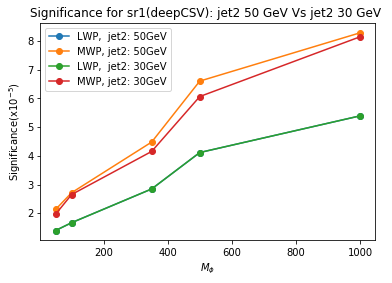

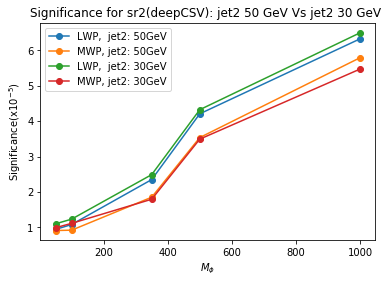

In [3]:
Mphi=['50','100','350','500','1000']
sr=['sr1','sr2']

for s in sr:
    for file in wpFile:
        sig_num=[]
        mass_point=[]
        masspoint={}
        plot_xy={}
        for mFile in file[0]:
            for mphi in Mphi:
                if 'Mphi-'+mphi in mFile:
                    masspoint.update({mFile : mphi})
        for sigFile in file[0]:
            #print(sigFile)
            if 'll' in sigFile and not 'jet230' in sigFile:
                WP='LWP,  jet2: 50GeV'
            elif 'mm' in sigFile and not'jet230' in sigFile:
                WP='MWP, jet2: 50GeV'
            elif 'll' in sigFile and 'jet230' in sigFile:
                WP='LWP,  jet2: 30GeV'
            elif 'mm' in sigFile and 'jet230' in sigFile:
                WP='MWP, jet2: 30GeV'                
            bkg=[i for i in file[1] if s in i and 'jet1' in i]
            #print (bkg[0])
            plot_xy.update({int(masspoint[sigFile]):(sig_bkg(sigFile,bkg[0],s))*100000})     
        plot_xy_sorted = sorted(plot_xy.items(), key=operator.itemgetter(0))
        x, y = zip(*plot_xy_sorted)
        plt.plot(x,y,'o-',label=WP)
        
    plt.xlabel(r'$M_{\phi}$')
    plt.ylabel("Significance(x$10^{-5}$)")
    plt.legend()#ncol=3,title=r"tan$\beta$")
    plt.title(r"Significance for "+s+"(deepCSV): jet2 50 GeV Vs jet2 30 GeV ")
    plt.savefig(s+'jet1.pdf')
    plt.show()
    plt.clf()
    plt.cla()
    plt.close('all')